# Not completed. 

In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [8]:
argentina_df_ind = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                      (indicator_data['CountryCode'] == 'AR')]

In [9]:
argentina_df_ind.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [469]:
argentina_df_ind

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,-2.298176,GDP growth (annual %)
2015-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,2.647271,GDP growth (annual %)
2014-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,-2.512615,GDP growth (annual %)
2013-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,2.405324,GDP growth (annual %)
2012-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,-1.026420,GDP growth (annual %)
2011-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,6.003952,GDP growth (annual %)
2010-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,10.125398,GDP growth (annual %)
2009-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,-5.918525,GDP growth (annual %)
2008-01-01,Argentina,AR,NY.GDP.MKTP.KD.ZG,4.057233,GDP growth (annual %)


In [317]:
ts = argentina_df_ind['Value']
ts1 = argentina_df_ind[['Value']].copy()
ts1['Value']=ts1['Value']+20
ts1.head()

,Value
Year,
2016-01-01,17.701824
2015-01-01,22.647271
2014-01-01,17.487385
2013-01-01,22.405324
2012-01-01,18.973580


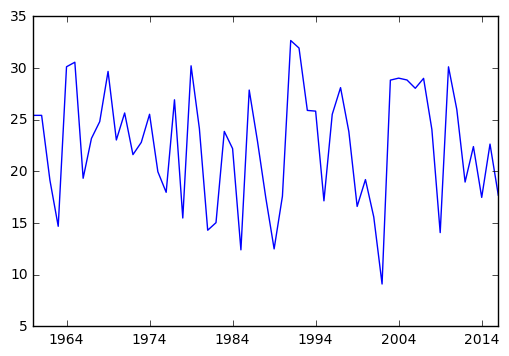

In [318]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


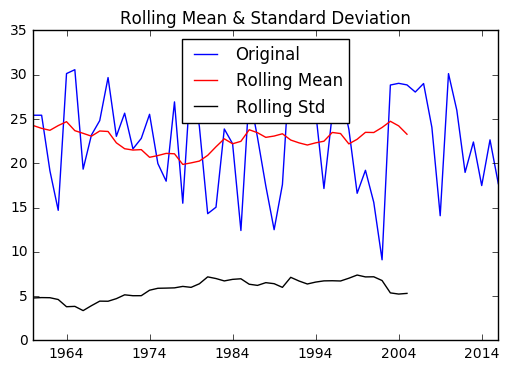

Results of Dickey-Fuller Test:
Test Statistic                -5.842223e+00
p-value                        3.754184e-07
#Lags Used                     1.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (5%)           -2.915731e+00
Critical Value (1%)           -3.555273e+00
Critical Value (10%)          -2.595670e+00
dtype: float64


In [323]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

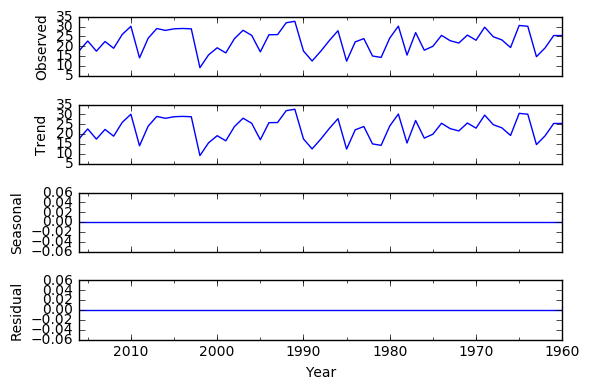

In [324]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

In [325]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

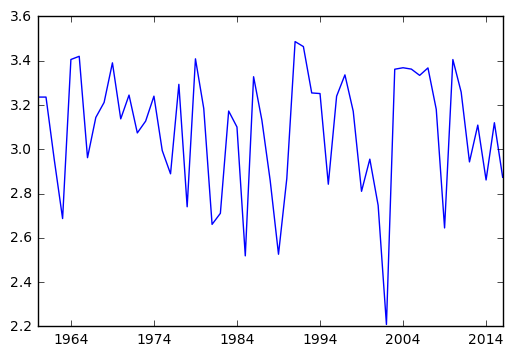

In [326]:
ts1_log = logTransform(ts1)

In [200]:
#test_stationarity(ts1_log.Value)

In [327]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


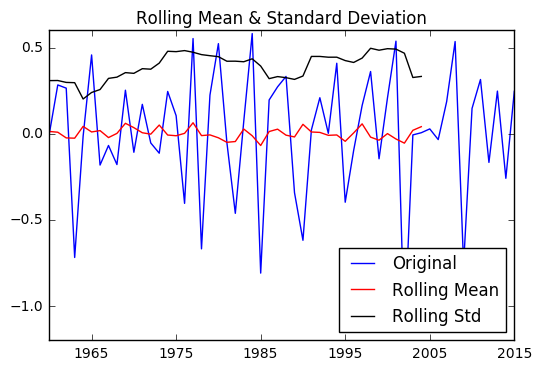

Results of Dickey-Fuller Test:
Test Statistic                 -3.990475
p-value                         0.001461
#Lags Used                     10.000000
Number of Observations Used    45.000000
Critical Value (5%)            -2.928299
Critical Value (1%)            -3.584829
Critical Value (10%)           -2.602344
dtype: float64


In [328]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

In [329]:
def firstDifference(df):
    ts_first_diff = df - df.shift()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


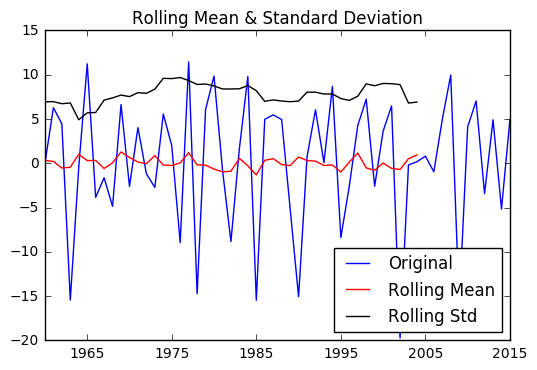

Results of Dickey-Fuller Test:
Test Statistic                 -5.535895
p-value                         0.000002
#Lags Used                      5.000000
Number of Observations Used    50.000000
Critical Value (5%)            -2.921360
Critical Value (1%)            -3.568486
Critical Value (10%)           -2.598662
dtype: float64


In [330]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [430]:
lag_acf = acf(ts1_log_diff, nlags=10)
lag_pacf = pacf(ts1_log_diff, nlags=10, method='ols')

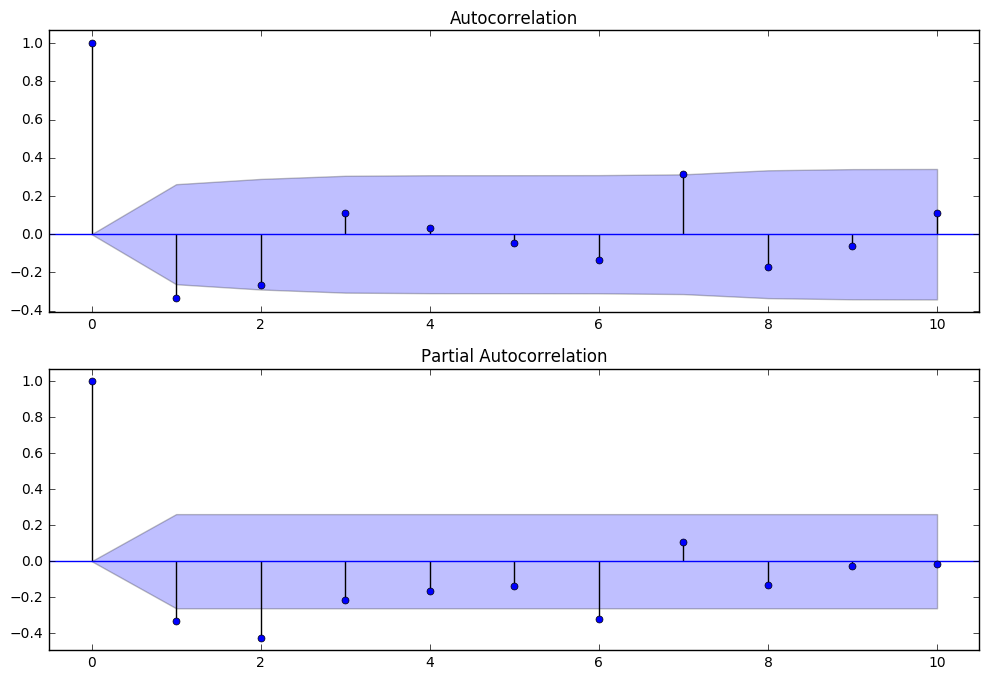

In [431]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log_diff, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log_diff, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

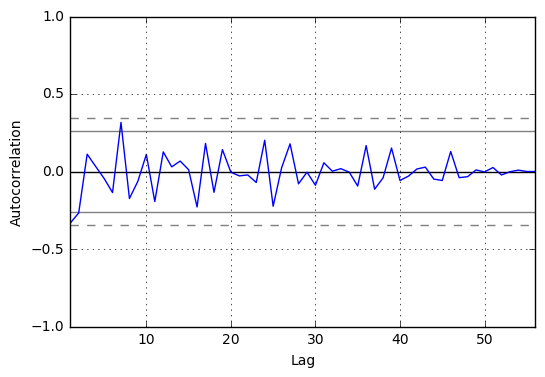

In [432]:
autocorrelation_plot(ts1_log_diff)
plt.show()

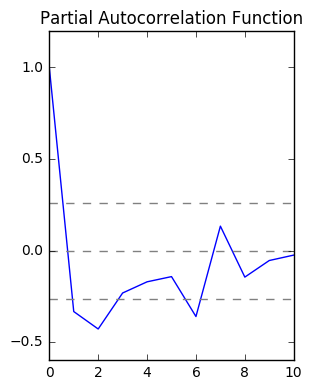

In [433]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [434]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [435]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [436]:
def AR_Model(ts):
    model = ARIMA(ts, order=(1, 1, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(1, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 1
Coefficients: const            0.000427
ar.L1.D.Value   -0.519326
dtype: float64
2005-01-01    1.122225
Freq: -1AS-JAN, dtype: float64
90.86254418330691


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


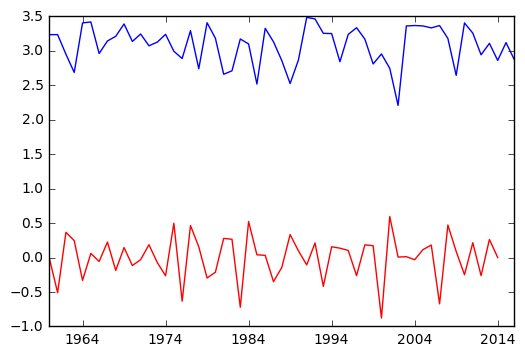

In [437]:
model_AR = AR_Model(ts1_log_diff)

In [413]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,1, 1))  
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 1, 2))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const           -0.000116
ma.L1.D.Value   -0.999947
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   55
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -26.240
Method:                       css-mle   S.D. of innovations              0.376
Date:                Mon, 14 Aug 2017   AIC                             58.480
Time:                        23:32:36   BIC                             64.502
Sample:                    01-01-2014   HQIC                            60.809
                         - 01-01-1960                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -0.0001      0.003     -0.037      0.970        -0.006     0.006
ma.L1.D.Value    -0.9999      0.04

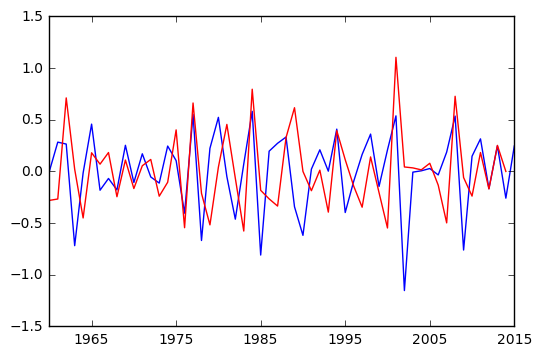

In [438]:
model_MA = MA_Model(ts1_log_diff)

In [419]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 1, 1))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,1, 3))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 2
Coefficients: const           -0.000129
ar.L1.D.Value   -0.458611
ar.L2.D.Value   -0.408477
ma.L1.D.Value   -0.999925
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   55
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -18.273
Method:                       css-mle   S.D. of innovations              0.320
Date:                Mon, 14 Aug 2017   AIC                             46.546
Time:                        23:32:44   BIC                             56.582
Sample:                    01-01-2014   HQIC                            50.427
                         - 01-01-1960                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -0.0001      0.001     -0.088      0.930       

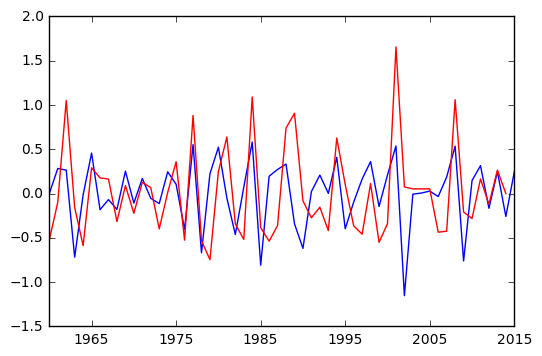

In [439]:
model_Combined = Combined_Model(ts1_log_diff)

In [440]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2,1, 3))


In [441]:
aic_metric

,AIC,Modelname
0,90.862544,"ARIMA(ts, order=(1, 0, 0))"
0,58.480423,"ARIMA(ts, order=(2, 1, 2))"
0,46.545582,"ARIMA(ts, order=(2,1, 3))"


In [464]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    output = np.exp(output)
    #print(output)
    return normal(output)

In [477]:
def forC(n):
    output_forecast = forecast(model_Combined,57)
    return output_forecast[:n]

forC(57)

Year
2016-01-01   -19.111914
2015-01-01   -18.059205
2014-01-01   -17.037352
2013-01-01   -16.071209
2012-01-01   -15.068026
2011-01-01   -14.059406
2010-01-01   -13.068866
2009-01-01   -12.072518
2008-01-01   -11.071711
2007-01-01   -10.075573
2006-01-01    -9.079357
2005-01-01    -8.081512
2004-01-01    -7.084687
2003-01-01    -6.088301
2002-01-01    -5.091537
2001-01-01    -4.095008
2000-01-01    -3.098765
1999-01-01    -2.102536
1998-01-01    -1.106424
1997-01-01    -0.110493
1996-01-01     0.885328
1995-01-01     1.881034
1994-01-01     2.876597
1993-01-01     3.872032
1992-01-01     4.867344
1991-01-01     5.862525
1990-01-01     6.857576
1989-01-01     7.852500
1988-01-01     8.847296
1987-01-01     9.841962
1986-01-01    10.836500
1985-01-01    11.830909
1984-01-01    12.825190
1983-01-01    13.819343
1982-01-01    14.813367
1981-01-01    15.807263
1980-01-01    16.801030
1979-01-01    17.794669
1978-01-01    18.788179
1977-01-01    19.781561
1976-01-01    20.774815
1975-01-01 

In [303]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal=np.exp(fittedVal)
    np.savetxt('PredictedValues.csv', PredictedVal, delimiter=",")
    print('Predicted existing values are:')
    return PredictedVal

# Taking it to normal scale

In [476]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(ts1_log.ix[0], index=ts1_log.index)
    #print(predictions_ARIMA_diff_cumsum.shape," ",predictions_ARIMA_log.shape)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    #predictions_ARIMA = np.exp(predictions_ARIMA_log)
    predictions_ARIMA_log = predictions_ARIMA_log -20
    return predictions_ARIMA_log